# [2025 DPR Proj] 인공지능공학부-3학년-2315726-이가은

---

(A) **스포츠 데이터 기반 챗봇 프로젝트**  
- 분야: 스포츠 데이터 분석 & 자연어 처리  
- 주제 구분: 본인이 수집한 Sofascore 축구 경기 데이터(`comments_*.json`)를 기반으로 직접 구현

---

(B) **모델 및 시스템 목적**  
- 축구 경기 이벤트 (`comment`) 데이터를 기반으로
- 사용자의 질의(예: "goal Son", "penalty var")에 따라 **관련 장면을 자동 검색·요약**해주는 **인터랙티브 챗봇** 구현

---

(C) **학습 데이터 및 데이터량**  
- 사용 데이터: UEFA 유로파리그 토트넘 5경기 (8강 1·2차전 & 4강 1·2차전 & 결승) 의 실시간 경기 comment 로그  
- Sofascore에서 수집한 `.json` 파일(5개)  
- 총 데이터 수: 약 500개 이상의 comment 이벤트 (goal, card, var 등 포함)

---

(D) **입력 및 동작 방식**  
- 입력: 사용자가 `"goal Son"`과 같이 특정 키워드를 입력  
- 처리: 각 json 파일 내의 `"comments"` 텍스트를 순회하며 키워드와 매칭  
- 출력: Markdown 형식으로 해당 이벤트 내용을 경기 이름과 함께 하이라이트 출력  
  (⚽ 골, 📕 카드, 🟨 VAR 등 이모지 태그 포함)

---

(E) **출력 결과 및 의미**  
- 사용자가 입력한 키워드에 맞는 **경기 장면 설명과 경기 정보**를 자동 출력  
- 자연어 검색 기반으로 원하는 장면을 쉽게 찾을 수 있는 **경기 요약 챗봇 시스템**

---

※ 모든 단계별 코드와 실행 결과, 하이라이트 요약 테이블, 챗봇 검색 결과 화면까지 함께 포함함.
- 예시 출력:


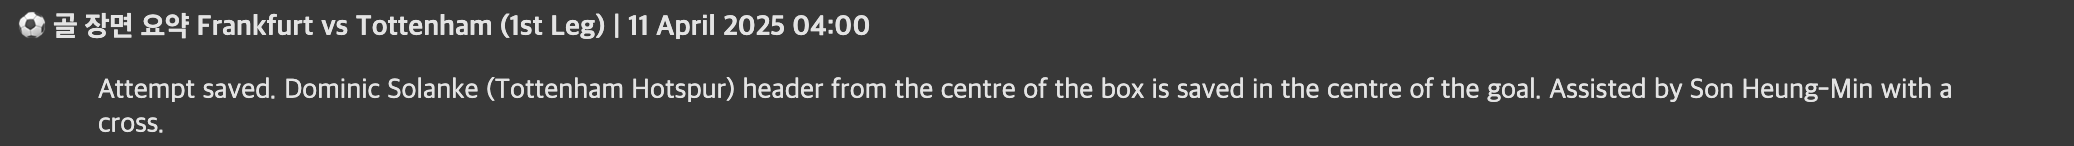

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/son_goal.png"))


# 하이라이트 요약 테이블 *코드*

- 사용한 경기 데이터 사이트:
1. https://optaplayerstats.statsperform.com/en_GB/soccer/uefa-europa-league-2024-2025/ejcp3vqc3ac7q66lowlv41ixg/match/view/1rncpj8trvlcnr74nvzstnehg/match-summary
2. https://optaplayerstats.statsperform.com/en_GB/soccer/uefa-europa-league-2024-2025/ejcp3vqc3ac7q66lowlv41ixg/match/bod%C3%B8-glimt-vs-tottenham-hotspur/f0pmq5h7z6qmu4k9xafybyluc/match-summary
3. https://optaplayerstats.statsperform.com/en_GB/soccer/uefa-europa-league-2024-2025/ejcp3vqc3ac7q66lowlv41ixg/match/tottenham-hotspur-vs-bod%C3%B8-glimt/ezztydm24qeata71t4oyleg44/match-summary
4. https://optaplayerstats.statsperform.com/en_GB/soccer/uefa-europa-league-2024-2025/ejcp3vqc3ac7q66lowlv41ixg/match/eintracht-frankfurt-vs-tottenham-hotspur/895x0yxa112807yy1tqkjbfh0/match-summary
5. https://optaplayerstats.statsperform.com/en_GB/soccer/uefa-europa-league-2024-2025/ejcp3vqc3ac7q66lowlv41ixg/match/tottenham-hotspur-vs-eintracht-frankfurt/88bbi2smjjmhwdd7zdqmfwtuc/match-summary

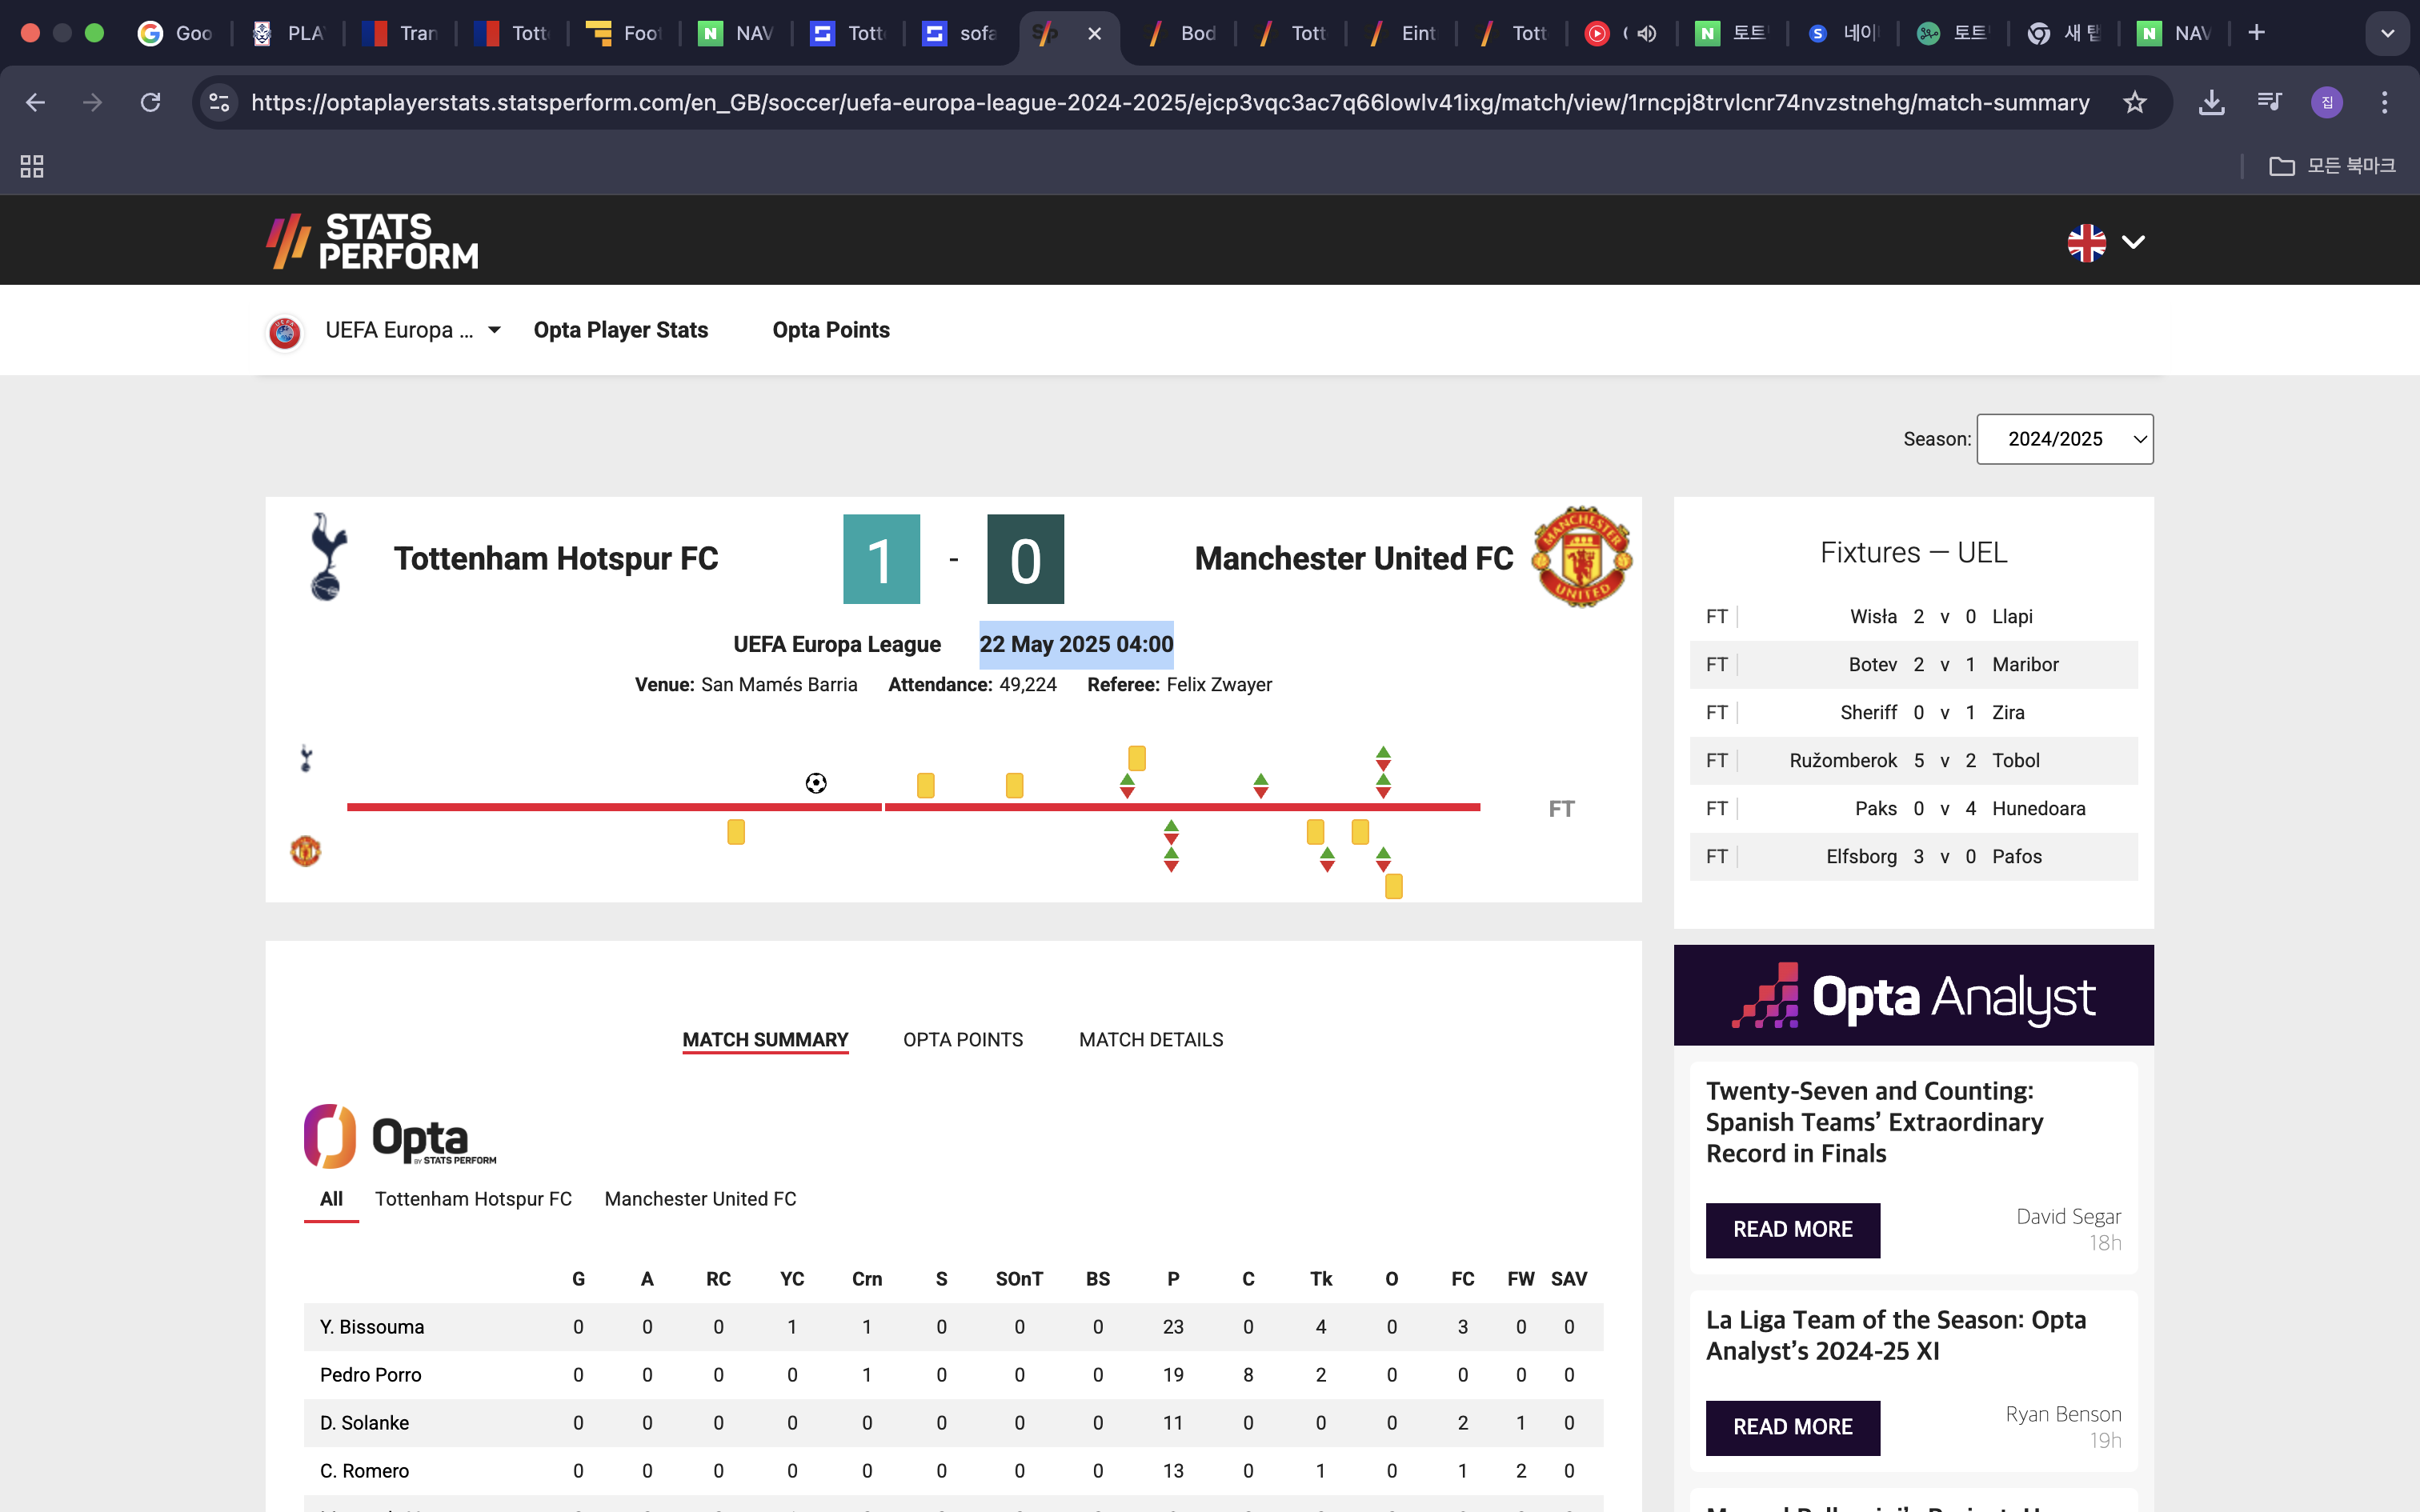

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/data.png", width=700))


In [ ]:
import pandas as pd
import json

# 수동 저장한 JSON 파일
json_paths = [
    "/content/comments_13514531.json",
    "/content/comments_13514554.json",
    "/content/comments_13514556.json",
    "/content/comments_13514559.json",
    "/content/comments_13523532.json"
]

match_labels = [
    "Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00",
    "Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00",
    "Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00",
    "Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00",
    "Tottenham vs Man United (Final) | 22 May 2025 04:00",
]

highlight_keywords = ["goal", "scores", "penalty", "saved", "red card", "yellow card", "attempt", "ends", "wins"]
all_highlights = []

for path, label in zip(json_paths, match_labels):
    with open(path, 'r', encoding='utf-8') as f:
        comments = json.load(f).get("comments", [])
        count = 0
        for c in comments:
            text = c.get("text", "")
            if any(k in text.lower() for k in highlight_keywords):
                if count < 3:
                    all_highlights.append({
                        "Match": label,
                        "Highlight": f"Highlight {count+1}",
                        "Summary": text.strip()
                    })
                    count += 1

df = pd.DataFrame(all_highlights)
df


,Match,Highlight,Summary
0,Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00,Highlight 1,"Match ends, Tottenham Hotspur 1, Eintracht Frankfurt 1."
1,Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00,Highlight 2,"Second Half ends, Tottenham Hotspur 1, Eintracht Frankfurt 1."
2,Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00,Highlight 3,Attempt saved. Micky van de Ven (Tottenham Hotspur) header from very close range is saved in the top left corner. Assisted by Rodrigo Bentancur with a headed pass.
3,Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00,Highlight 1,"Match ends, Tottenham Hotspur 3, Bodø/Glimt 1."
4,Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00,Highlight 2,"Second Half ends, Tottenham Hotspur 3, Bodø/Glimt 1."
5,Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00,Highlight 3,"Attempt missed. Dejan Kulusevski (Tottenham Hotspur) right footed shot from the centre of the box is close, but misses to the right. Assisted by Wilson Odobert."
6,Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00,Highlight 1,"Match ends, Eintracht Frankfurt 0, Tottenham Hotspur 1."
7,Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00,Highlight 2,"Second Half ends, Eintracht Frankfurt 0, Tottenham Hotspur 1."
8,Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00,Highlight 3,Ellyes Skhiri (Eintracht Frankfurt) wins a free kick in the attacking half.
9,Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00,Highlight 1,"Match ends, Bodø/Glimt 0, Tottenham Hotspur 2."


### 1. [실제 하이라이트 요약 테이블] 이미지

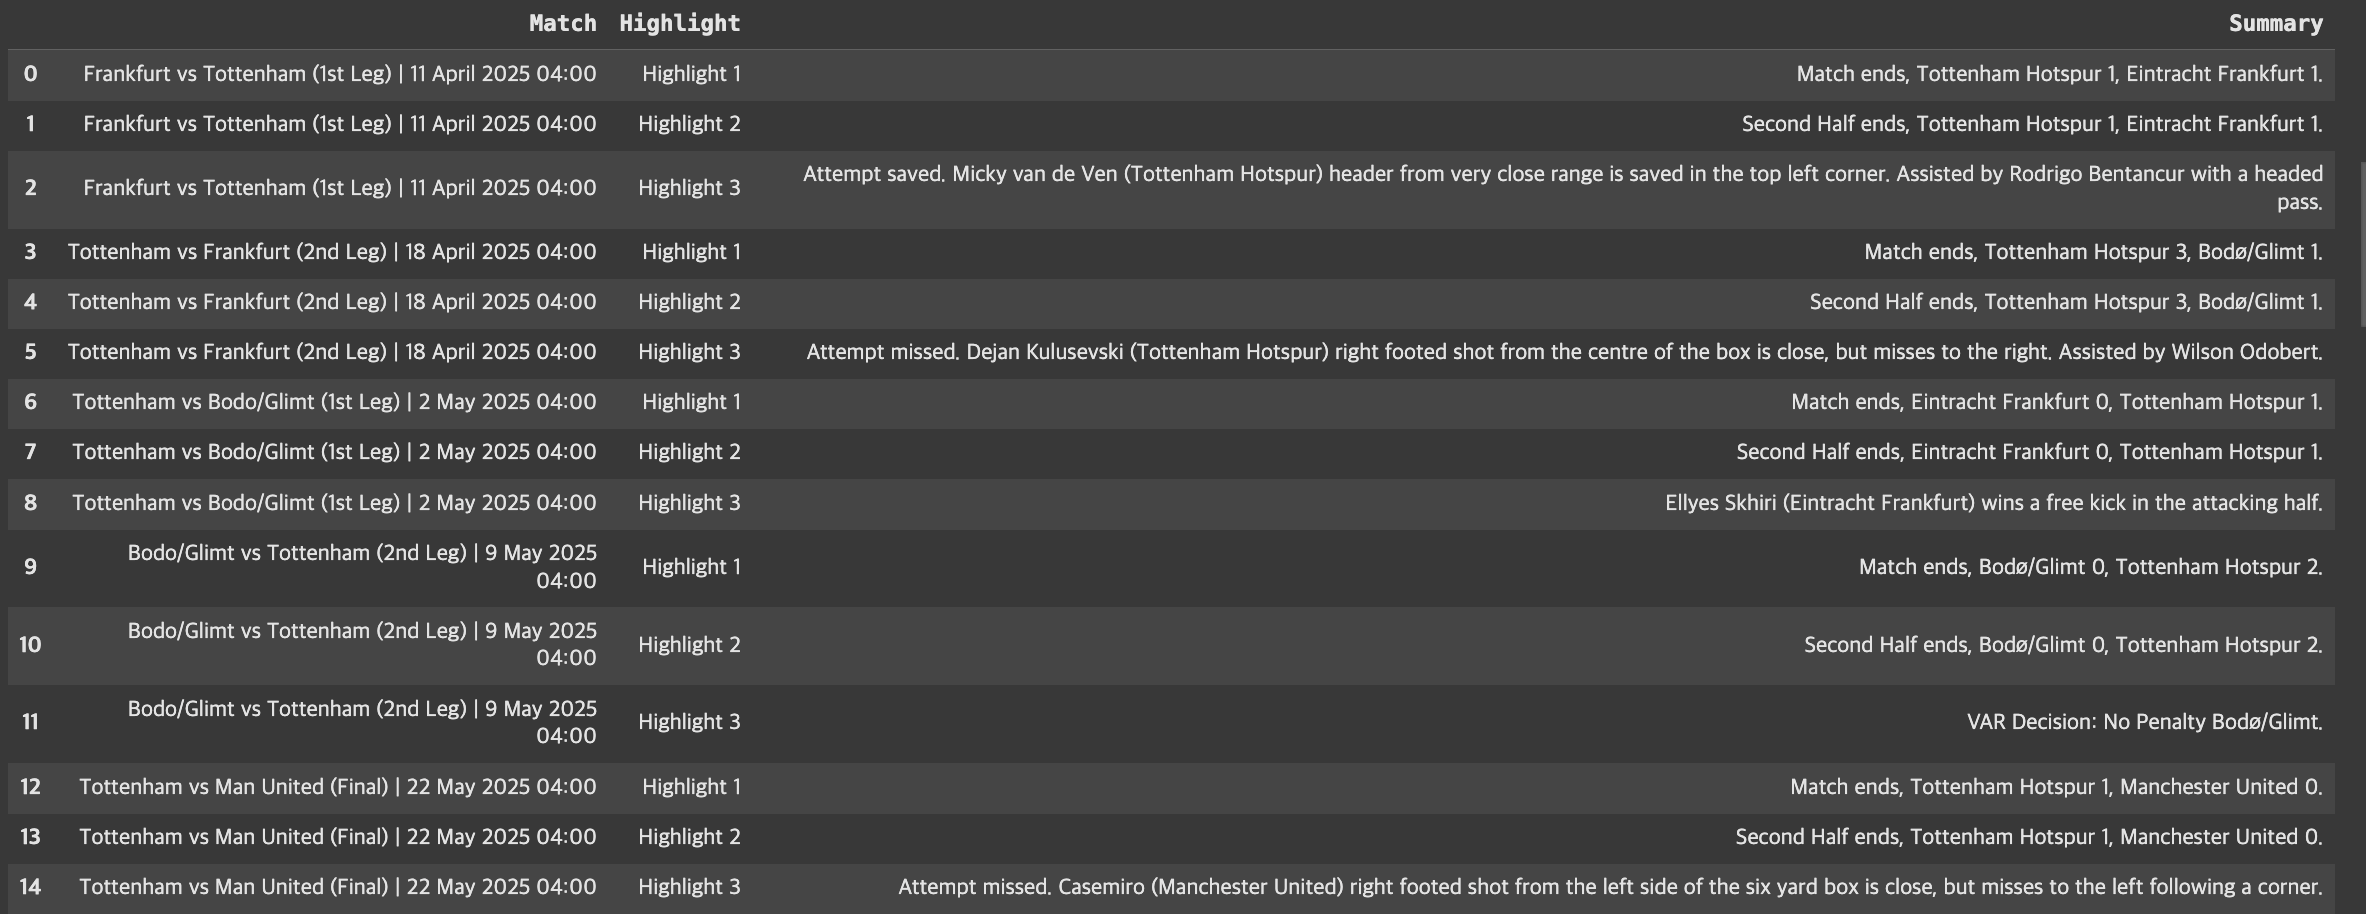

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/highlight_table.png", width=700))

# 챗봇 코드

In [ ]:
import json
import pandas as pd
import re

# 🎯 JSON 파일 경로 및 경기 라벨
json_paths = [
    '/content/comments_13514531.json',
    '/content/comments_13514554.json',
    '/content/comments_13514556.json',
    '/content/comments_13514559.json',
    '/content/comments_13523532.json'
]

match_labels = [
    "Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00",
    "Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00",
    "Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00",
    "Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00",
    "Tottenham vs Man United (Final) | 22 May 2025 04:00",
]

# 요약 태그 분류 함수
def tag_summary(text):
    t = text.lower()
    if "goal" in t or "scores" in t:
        return "⚽ 골 장면 요약"
    elif "yellow card" in t or "red card" in t:
        return "📕 카드 장면 요약"
    elif "great chance" in t or "missed" in t:
        return "❗ 결정적 찬스 장면"
    elif "penalty" in t or "var" in t:
        return "🟨 VAR/판정 장면"
    elif "ends" in t:
        return "🔚 경기 종료"
    else:
        return "기타 주요 장면"

# 키워드 기반 하이라이트 추출
highlight_keywords = [
    'goal', 'scores', 'penalty', 'saved',
    'red card', 'yellow card', 'attempt',
    'ends', 'wins', 'missed'
]

all_highlights = []

for path, label in zip(json_paths, match_labels):
    with open(path, 'r', encoding='utf-8') as f:
        comments = json.load(f).get("comments", [])
        count = 0
        for c in comments:
            text = c.get("text", "")
            if any(k in text.lower() for k in highlight_keywords):
                if count < 3:
                    all_highlights.append({
                        "Match": label,
                        "Highlight": f"Highlight {count+1}",
                        "Summary": text.strip(),
                        "Tag": tag_summary(text)
                    })
                    count += 1

df = pd.DataFrame(all_highlights)

# 챗봇 질의응답 함수 (전체 comments에서 검색)
from IPython.display import Markdown, display

def comment_bot(query):
    query = query.lower().replace("-", " ")
    terms = query.split()
    results = []

    for path, label in zip(json_paths, match_labels):
        with open(path, 'r', encoding='utf-8') as f:
            comments = json.load(f).get("comments", [])
            for c in comments:
                text = c.get("text", "")
                text_lower = text.lower()
                if all(re.search(rf'\b{re.escape(term)}\b', text_lower) for term in terms):
                    tag = tag_summary(text)
                    results.append(f"**{tag} {label}**\n\n> {text.strip()}")

    if not results:
        display(Markdown("❌ 해당 키워드에 맞는 장면이 없습니다."))
    else:
        display(Markdown("\n\n".join(results[:30])))



## 챗봇 예시

In [ ]:
comment_bot("son goal")

**⚽ 골 장면 요약 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Attempt saved. Dominic Solanke (Tottenham Hotspur) header from the centre of the box is saved in the centre of the goal. Assisted by Son Heung-Min with a cross.

In [ ]:
comment_bot("penalty var")

**🟨 VAR/판정 장면 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> VAR Decision: Penalty Tottenham Hotspur.

**🟨 VAR/판정 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> VAR Decision: Penalty Tottenham Hotspur.

**🟨 VAR/판정 장면 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> VAR Decision: No Penalty Bodø/Glimt.

In [ ]:
comment_bot("red card")

❌ 해당 키워드에 맞는 장면이 없습니다.

In [ ]:
comment_bot("yellow card")

**📕 카드 장면 요약 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Mathys Tel (Tottenham Hotspur) is shown the yellow card.

**📕 카드 장면 요약 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Rasmus Kristensen (Eintracht Frankfurt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Jean-Mattéo Bahoya (Eintracht Frankfurt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Jens Petter Hauge (Bodø/Glimt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Cristian Romero (Tottenham Hotspur) is shown the yellow card.

**📕 카드 장면 요약 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Fredrik Bjørkan (Bodø/Glimt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Cristian Romero (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Arthur Theate (Eintracht Frankfurt) is shown the yellow card.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Rodrigo Bentancur (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Rasmus Kristensen (Eintracht Frankfurt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Kauã Santos (Eintracht Frankfurt) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Guglielmo Vicario (Tottenham Hotspur) is shown the yellow card.

**📕 카드 장면 요약 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Kasper Høgh (Bodø/Glimt) is shown the yellow card.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Jonny Evans (Manchester United) is shown the yellow card.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Harry Maguire (Manchester United) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Joshua Zirkzee (Manchester United) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Yves Bissouma (Tottenham Hotspur) is shown the yellow card.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Richarlison (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Micky van de Ven (Tottenham Hotspur) is shown the yellow card for a bad foul.

**📕 카드 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Amad Diallo (Manchester United) is shown the yellow card for a bad foul.

In [ ]:
comment_bot("Johnson goal")

**✅ Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Goal! Tottenham Hotspur 1, Bodø/Glimt 0. Brennan Johnson (Tottenham Hotspur) header from very close range to the bottom left corner. Assisted by Richarlison with a headed pass.

**✅ Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Goal! Tottenham Hotspur 1, Manchester United 0. Brennan Johnson (Tottenham Hotspur) right footed shot from very close range to the bottom left corner.

In [ ]:
comment_bot("Johnson")

**❗ 결정적 찬스 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Attempt missed. Brennan Johnson (Tottenham Hotspur) left footed shot from the centre of the box is high and wide to the left. Assisted by Djed Spence with a cross.

**기타 주요 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

**기타 주요 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) wins a free kick in the defensive half.

**기타 주요 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) wins a free kick in the defensive half.

**기타 주요 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

**기타 주요 장면 Frankfurt vs Tottenham (1st Leg) | 11 April 2025 04:00**

> Corner, Eintracht Frankfurt. Conceded by Brennan Johnson.

**기타 주요 장면 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) wins a free kick on the right wing.

**기타 주요 장면 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

**⚽ 골 장면 요약 Tottenham vs Frankfurt (2nd Leg) | 18 April 2025 04:00**

> Goal! Tottenham Hotspur 1, Bodø/Glimt 0. Brennan Johnson (Tottenham Hotspur) header from very close range to the bottom left corner. Assisted by Richarlison with a headed pass.

**기타 주요 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Substitution, Tottenham Hotspur. Kevin Danso replaces Brennan Johnson.

**기타 주요 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Attempt blocked. Dominic Solanke (Tottenham Hotspur) right footed shot from the right side of the box is blocked. Assisted by Brennan Johnson.

**기타 주요 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Attempt blocked. Dejan Kulusevski (Tottenham Hotspur) left footed shot from the right side of the box is blocked. Assisted by Brennan Johnson.

**기타 주요 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Corner, Eintracht Frankfurt. Conceded by Brennan Johnson.

**📕 카드 장면 요약 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) is shown the yellow card for a bad foul.

**❗ 결정적 찬스 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Attempt missed. Mathys Tel (Tottenham Hotspur) right footed shot from the centre of the box misses to the left. Assisted by Brennan Johnson following a fast break.

**기타 주요 장면 Tottenham vs Bodo/Glimt (1st Leg) | 2 May 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

**기타 주요 장면 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Substitution, Tottenham Hotspur. Pape Sarr replaces Brennan Johnson because of an injury.

**기타 주요 장면 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Delay in match because of an injury Brennan Johnson (Tottenham Hotspur).

**📕 카드 장면 요약 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Brennan Johnson (Tottenham Hotspur) is shown the yellow card for a bad foul.

**기타 주요 장면 Bodo/Glimt vs Tottenham (2nd Leg) | 9 May 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

**기타 주요 장면 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Substitution, Tottenham Hotspur. Kevin Danso replaces Brennan Johnson.

**기타 주요 장면 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Corner,Manchester United. Conceded by Brennan Johnson.

**⚽ 골 장면 요약 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Goal! Tottenham Hotspur 1, Manchester United 0. Brennan Johnson (Tottenham Hotspur) right footed shot from very close range to the bottom left corner.

**기타 주요 장면 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Hand ball by Brennan Johnson (Tottenham Hotspur).

**기타 주요 장면 Tottenham vs Man United (Final) | 22 May 2025 04:00**

> Foul by Brennan Johnson (Tottenham Hotspur).

### 3. 챗봇 예시 - 존슨 하이라이트 출력 결과 이미지

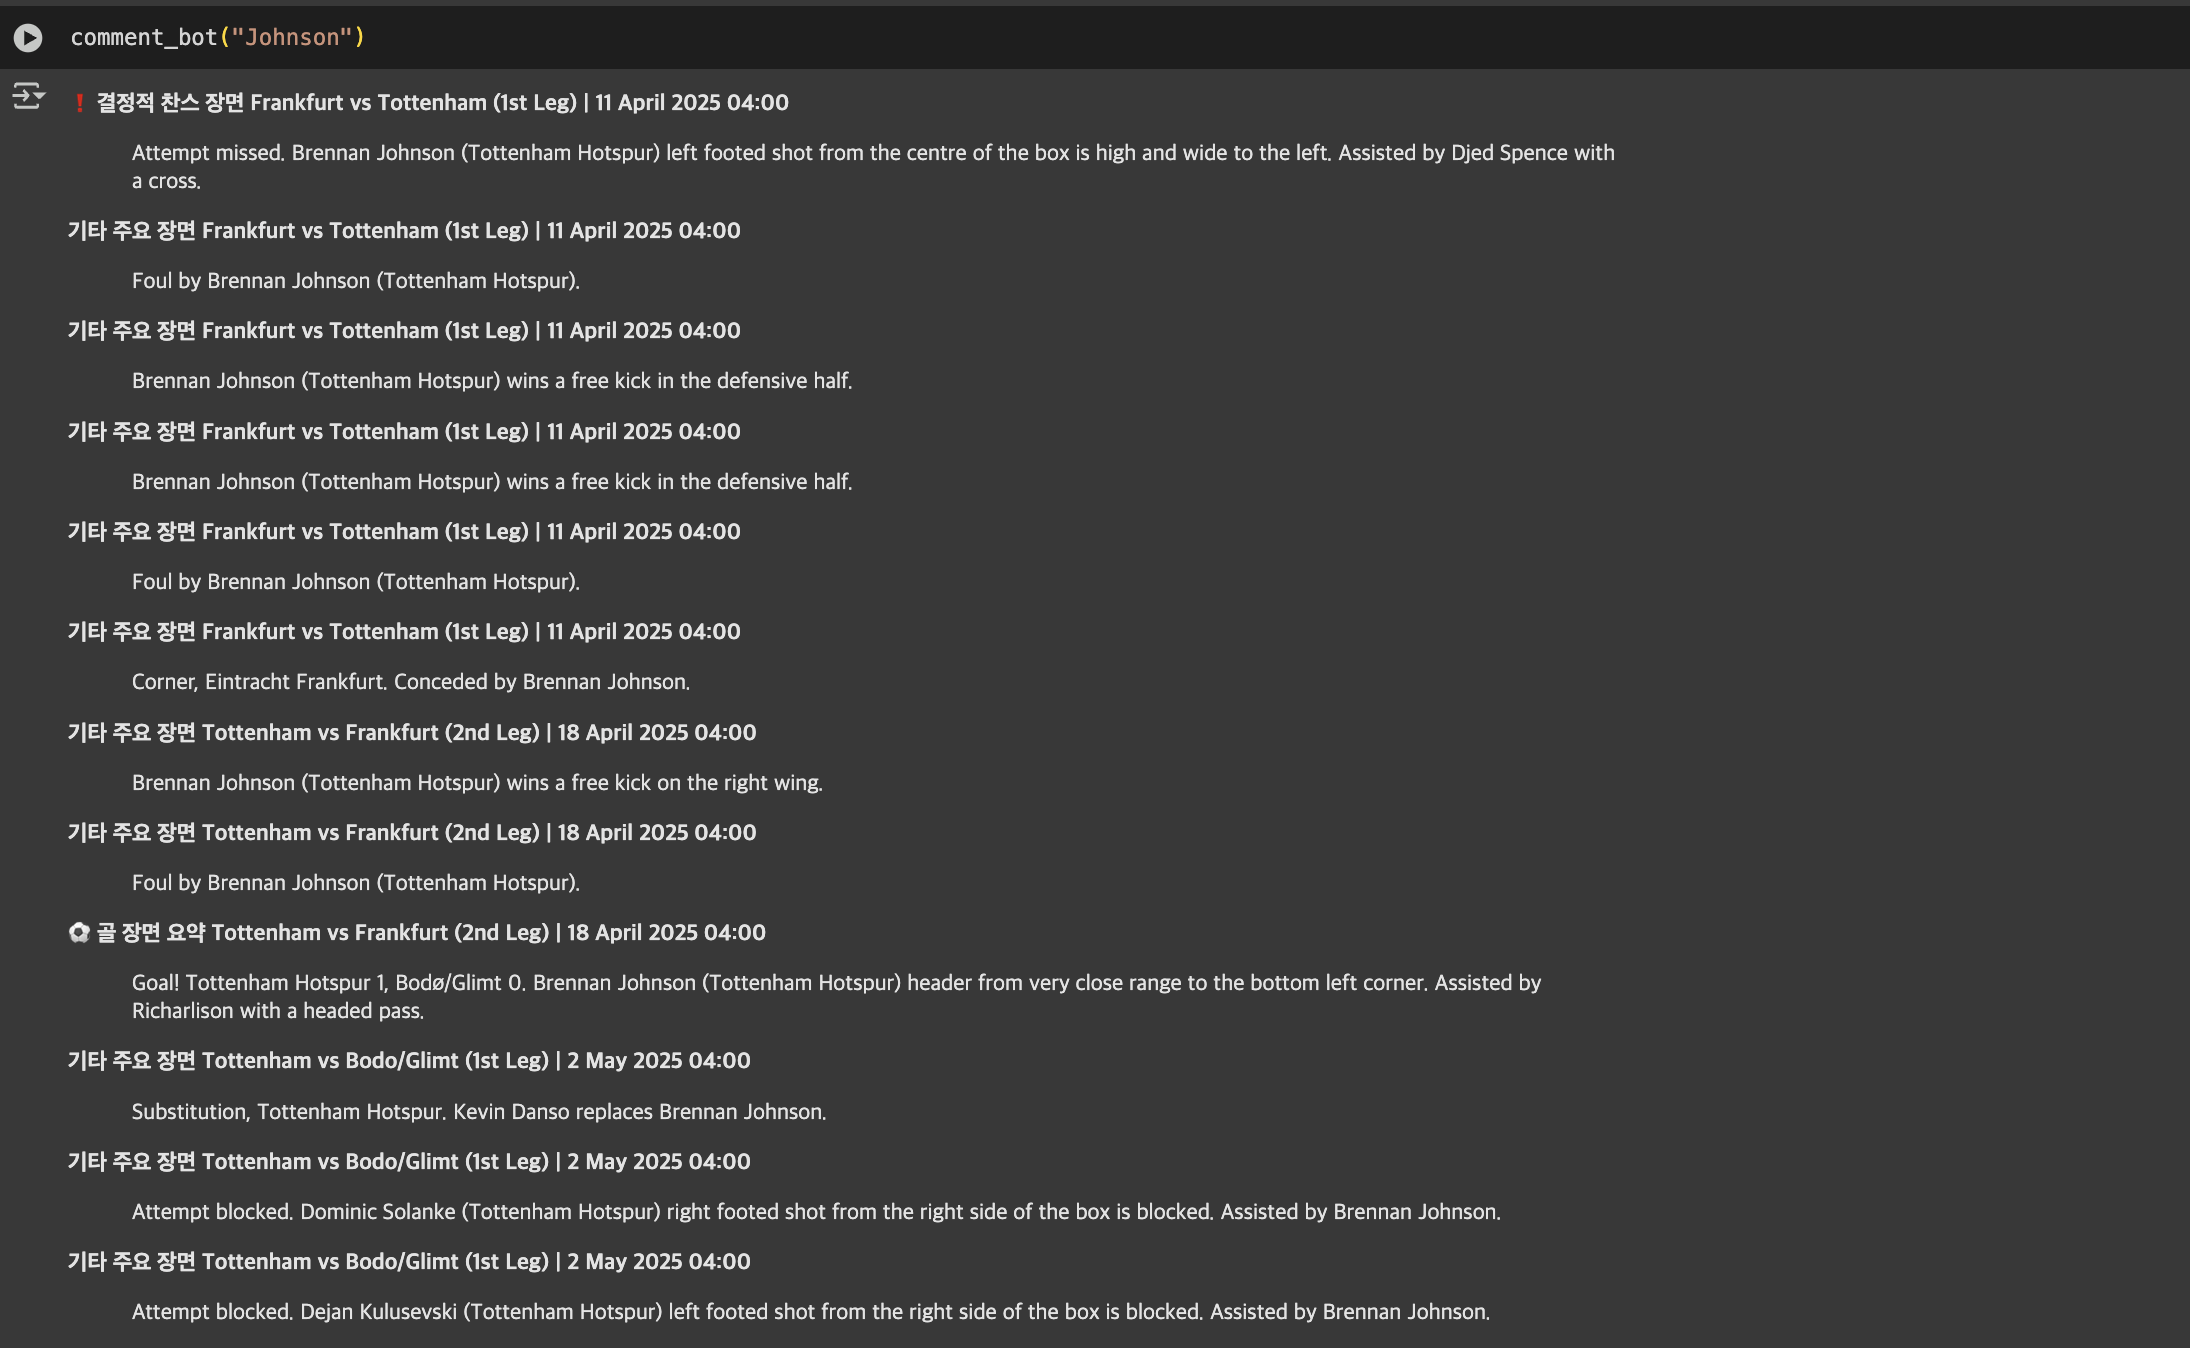

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/johnson.png", width=700))
